# Time Series: Simple Linear Regression

Regression is one of the ML learning Model which computes or predicts future based on the historical values.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_excel('data/regression_data.xlsx', engine='openpyxl')

df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


### EDA

#### Quantitative Technique
* Central Tendencies
* Measure of Spread

In [4]:
df.shape

(27, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
x    27 non-null float64
y    27 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [6]:
print(f"Mean: \n{df.mean()}\n")
print(f"Median: \n{df.median()}\n")
print(f"Mode: \n{df.mode()}\n")

Mean: 
x    2.236667
y    6.070000
dtype: float64

Median: 
x    2.18
y    3.20
dtype: float64

Mode: 
      x    y
0  1.85  1.7
1  2.18  2.4



In [7]:
# Measure of Spread
print(f"Variance: \n{df.var()}\n")
print(f"Standard Dev: \n{df.std()}\n")

Variance: 
x     0.714815
y    24.310415
dtype: float64

Standard Dev: 
x    0.845468
y    4.930559
dtype: float64



In [8]:
df.describe()

,x,y
count,27.000000,27.000000
mean,2.236667,6.070000
std,0.845468,4.930559
min,1.200000,1.200000
25%,1.730000,2.300000
50%,2.180000,3.200000
75%,2.520000,9.470000
max,4.600000,17.800000


#### Graphical Technique

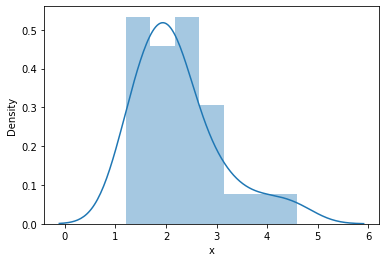

In [9]:
sns.distplot(df['x'])
plt.show()

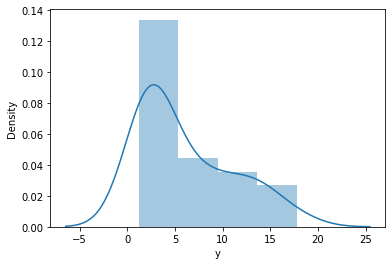

In [10]:
sns.distplot(df['y'])
plt.show()

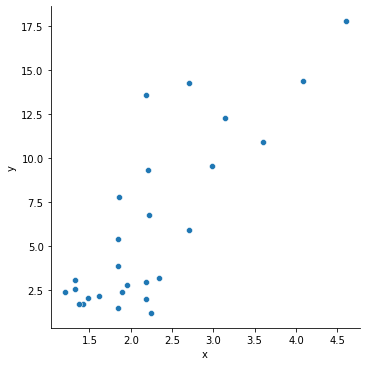

In [11]:
# Relationship Plot
sns.relplot(x='x', y='y', data=df)
plt.show()

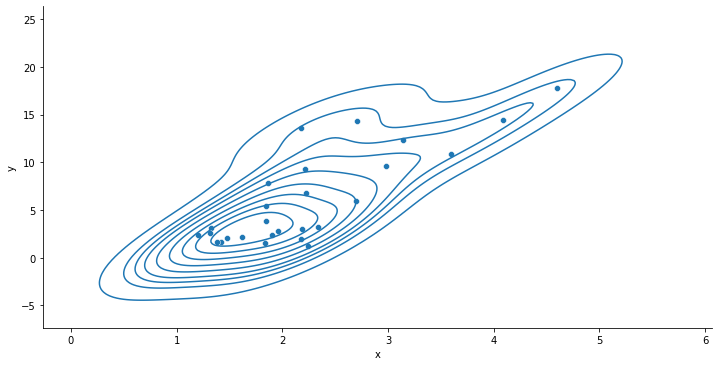

In [12]:
# Relationship Plot
sns.relplot(x='x', y='y', data=df, aspect=2)
sns.kdeplot(x='x', y='y', data=df, aspect=2)
plt.show()

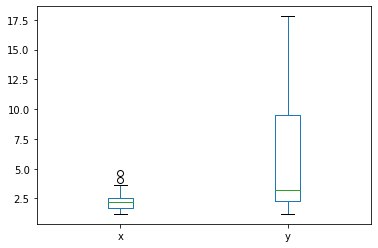

In [13]:
df.plot(kind='box')
plt.show()

### Fitting a Linear Regression Line through the data points

In [14]:
# Slope of the line
cov = df.cov()
cov

,x,y
x,0.714815,3.390746
y,3.390746,24.310415


In [15]:
b = cov['x']['y'] / cov['x']['x']
print(f"Slope b: {b}")

Slope b: 4.743527107590986


In [16]:
# Intercept of the line
a = df['y'].mean() - b * df['x'].mean()
print(f"Intercept a: {a}")

Intercept a: -4.539688963978507


In [17]:
def model_equation(x):
    y_hat = a + b * x
    return y_hat

In [18]:
y_pred = model_equation(df['x'])

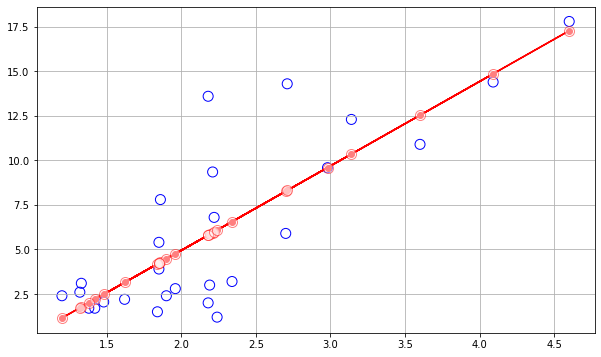

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], s=100, facecolors='none', edgecolors='b')
plt.plot(df['x'], y_pred, c='red')
plt.plot(df['x'], y_pred, 'ro')
plt.plot(df['x'], y_pred, 'ro', markersize=10, markerfacecolor='w', alpha=0.5)
plt.grid()
plt.show()

### Linear Regression with Sklearn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x.shape, y.shape

((27, 1), (27,))

In [22]:
model = LinearRegression()
model.fit(x, y)

print("Model Trained Successfully!")

Model Trained Successfully!


In [23]:
# Intercept
model.intercept_, model.coef_

(-4.539688963978516, array([4.74352711]))

In [24]:
y_pred = model.predict(x)

y_pred

array([ 2.19611953,  4.28327146,  2.48073116, 10.35498615,  5.94350594,
        4.75762417,  1.15254357,  4.47301254, 14.86133691,  9.59602182,
        5.8486354 ,  4.18840091,  5.80120013,  1.76920209,  5.80120013,
        5.99094121,  6.08581176,  3.14482495,  1.72176682,  4.23583619,
        4.23583619,  8.26783423, 12.53700862, 17.28053573,  2.00637844,
        6.56016447,  8.3152695 ])

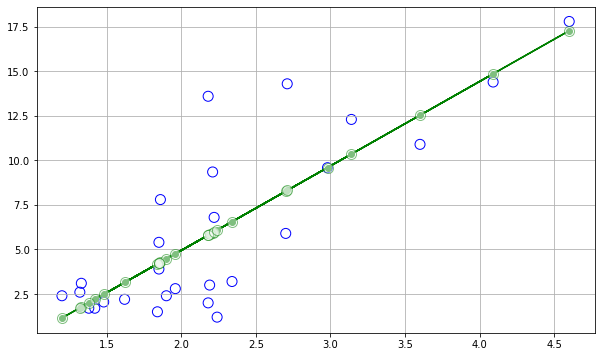

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=100, facecolors='none', edgecolors='b')
plt.plot(x, y_pred, c='g')
plt.plot(x, y_pred, 'go')
plt.plot(x, y_pred, 'go', markersize=10, markerfacecolor='w', alpha=0.5)
plt.grid()
plt.show()

### Linear Regression with Statsmodel

In [26]:
import statsmodels.api as sm

In [27]:
x_new = sm.add_constant(x)
model_sm = sm.OLS(y, x_new)
res = model_sm.fit()

In [28]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.50e-07
Time:                        11:07:23   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5397      1.619     -2.805      0.010      -7.873      -1.206
x1             4.7435      0.678      6.991      0.000       3.346       6.141
==============================================================================
Omnibus:                        5.597   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                3.761
Skew:                           0.829   Prob(JB):                        0.153
Kurtosis:                       3.771   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x_test = sm.add_constant(x)
y_pred_sm = res.predict(x_test)

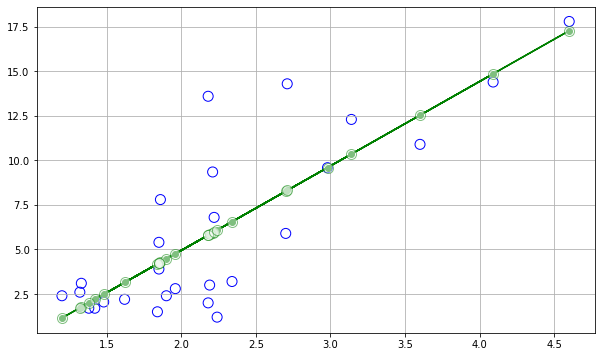

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=100, facecolors='none', edgecolors='b')
plt.plot(x, y_pred_sm, c='g')
plt.plot(x, y_pred_sm, 'go')
plt.plot(x, y_pred_sm, 'go', markersize=10, markerfacecolor='w', alpha=0.5)
plt.grid()
plt.show()